<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Портрет-пользователя-каждого-региона" data-toc-modified-id="Портрет-пользователя-каждого-региона-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Портрет пользователя каждого региона</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование продаж компьютерных игр

Интернет-магазин «Стримчик» продаёт компьютерные игры по всему миру. Из открытых источников имеем исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).    
**Цель:** выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».    
    
*Описание исходных данных*
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Изучение данных из файла

In [2]:
#Загружаем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

import warnings
warnings.filterwarnings('ignore') #отключим выпадающие сообщения о циклических присваиваниях

#Загружаем данные
try:
    # Локальный путь
    data_calls = pd.read_csv('C:/Users/datasets/games.csv')
except:
    # Серверный путь
    data = pd.read_csv('/datasets/games.csv')

#Изучим общую информацию
display(data.sample(10))
display(data.describe())
data.info()

 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
733,Tom Clancy's Rainbow Six: Siege,PS4,2015.0,Shooter,0.55,1.19,0.14,0.33,73.0,7.3,M
11613,World Series of Poker 2008: Battle for the Bra...,X360,2007.0,Misc,0.06,0.01,0.00,0.01,74.0,6.7,T
7387,Move Fitness,PS3,NaN,Sports,0.00,0.16,0.00,0.05,NaN,NaN,NaN
5552,Chicken Riot,Wii,2010.0,Action,0.14,0.15,0.00,0.03,NaN,tbd,T
14064,Sid Meier's Railroads!,PC,2006.0,Simulation,0.01,0.03,0.00,0.00,NaN,NaN,NaN
4213,Two Worlds II,PS3,2011.0,Role-Playing,0.26,0.10,0.06,0.05,70.0,7,M
7196,Dinosaur King,DS,2007.0,Strategy,0.20,0.00,0.00,0.02,61.0,8,E
1514,Tekken 6,X360,2009.0,Fighting,0.71,0.41,0.05,0.12,80.0,7,T
16479,Wand of Fortune: Mirai e no Prologue,PS2,2010.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
1642,Parfait: Chocolat Second Style,PS2,2006.0,Adventure,0.59,0.46,0.01,0.15,NaN,NaN,NaN


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод

Исходный датафрейм состоит из 16715 строк и 11 столбцов. Данные в столбцах имеют различные типы:  вещественные числа и строчные объекты. Названия столбцов отображены некорректно. Имеются пропуски в столбцах 'Name', 'Year_of_Release', 'Genre', 'Critic_Score', 'User_Score' и 'Rating'. Столбец с годами необходимо перевести в соответствующий тип. Наличие дубликатов сразу не видно, но обязательно проверим их наличие или отсутствие в столбцах 'Platform' и 'Genre'. Учитывая специфику данных, метод describe() на данном этапе использовать нет смысла, разве что можно посмотреть реалистичность некоторых данных - например, максимальные данные по продажам могут вызвать сомнение, в случае необходимости обратим на это внимание позже.    
Прежде чем перейти к анализу, данные необходимо предварительно обработать.

## Предобработка данных

In [3]:
#изменим название столбцов
data = data.rename(columns={'Name':'name',
                            'Platform':'platform',
                            'Year_of_Release':'year_of_release',
                            'Genre':'genre',
                            'NA_sales':'na_sales',
                            'EU_sales':'eu_sales',
                            'JP_sales':'jp_sales',
                            'Other_sales':'other_sales',
                            'Critic_Score':'critic_score',
                            'User_Score':'user_score',
                            'Rating':'rating'})

#убираем пропуски
#посмотрим на пропуски в столбцах
print(data.isna().sum()) 
print()
#взглянем на пропущенные данные в столбце 'name'
display(data.sort_values(by='name').tail(5))
#пропуски в столбцах'name', 'genre' и 'year_of_release' удаляем
data = data.dropna(subset=['name', 'year_of_release']) 

#взглянем на данные в столбце 'user_score'
print(data['user_score'].sort_values(ascending=False).unique()) 
print()
#'tbd' меняем на 'nan'
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan')
#поменяем в столбце 'user_score' тип данных на float64
data['user_score'] = data['user_score'].astype('float64') 
print()

#проверим на явные дубликаты
print('Количество найденых явных дубликатов', data.duplicated().sum()) #дубликотов нет
print()
#проверим есть ли не явные дубликаты
print(data['platform'].sort_values().unique()) #все в порядке
print()
print(data['genre'].sort_values().unique()) #все в порядке
print()

#поменяем в столбце 'year_of_release' тип данных на int
data['year_of_release'] = data['year_of_release'].astype('int')
data.info() #больше ничего менять пока не требуется

#добавим столбец с суммарными продажами во всех регионах
data.insert(8, 'all_sales', 0)
data['all_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales'] 
display(data.sample(10))

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
8280,uDraw Studio: Instant Artist,Wii,2011.0,Misc,0.06,0.09,0.00,0.02,NaN,tbd,E
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
9134,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,0.00,0.00,0.14,0.00,NaN,NaN,NaN
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


['tbd' '9.7' '9.6' '9.5' '9.4' '9.3' '9.2' '9.1' '9' '8.9' '8.8' '8.7'
 '8.6' '8.5' '8.4' '8.3' '8.2' '8.1' '8' '7.9' '7.8' '7.7' '7.6' '7.5'
 '7.4' '7.3' '7.2' '7.1' '7' '6.9' '6.8' '6.7' '6.6' '6.5' '6.4' '6.3'
 '6.2' '6.1' '6' '5.9' '5.8' '5.7' '5.6' '5.5' '5.4' '5.3' '5.2' '5.1' '5'
 '4.9' '4.8' '4.7' '4.6' '4.5' '4.4' '4.3' '4.2' '4.1' '4' '3.9' '3.8'
 '3.7' '3.6' '3.5' '3.4' '3.3' '3.2' '3.1' '3' '2.9' '2.8' '2.7' '2.6'
 '2.5' '2.4' '2.3' '2.2' '2.1' '2' '1.9' '1.8' '1.7' '1.6' '1.5' '1.4'
 '1.3' '1.2' '1.1' '1' '0.9' '0.7' '0.6' '0.5' '0.3' '0.2' '0' nan]


Количество найденых явных дубликатов 0

['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne']

['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 1

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score,rating
3428,Final Fantasy Anniversary Edition,PSP,2007,Role-Playing,0.39,0.02,0.13,0.04,0.58,67.0,7.7,E10+
14731,Harukanaru Toki no Naka de 6,PSV,2015,Action,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN
152,Dragon Quest IX: Sentinels of the Starry Skies,DS,2009,Role-Playing,0.63,0.67,4.35,0.15,5.80,87.0,8.8,E10+
11162,The Mummy: Tomb of the Dragon Emperor,Wii,2008,Action,0.08,0.00,0.00,0.01,0.09,39.0,6.4,T
16171,Infinite Stratos 2: Love and Purge,PSV,2015,Action,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
2133,LEGO Star Wars II: The Original Trilogy,GC,2006,Action,0.75,0.19,0.00,0.03,0.97,84.0,9.1,E10+
6952,Big Family Games,Wii,2009,Misc,0.00,0.22,0.00,0.02,0.24,NaN,NaN,NaN
6167,Disney's Treasure Planet,GBA,2002,Action,0.20,0.07,0.00,0.01,0.28,68.0,NaN,E
4634,Spec Ops: The Line,X360,2012,Shooter,0.21,0.17,0.00,0.04,0.42,76.0,8.2,M
11426,Touch Mechanic,DS,2008,Simulation,0.08,0.00,0.00,0.01,0.09,54.0,NaN,E


### Вывод

Следуя правилам хорошего тона используя «змеиный_регистр» изменим названия столбцов.    
Пропусков в столбцах'name', 'genre' всего два и они симметричны. Появились скорее все случайно в результате технической ошибки. Удалим их. Пропусков в столбце 'year_of_release' чуть более 1%, восстановить или заменить их также как и в предыдущем случае не представляется возможным, поэтому этими данными также пожертвуем. Пропуски в столбцах 'critic_score', 'user_score' и 'rating'появились скорее всего из за отсутствия соответствующих оценок и рейтинга, возможно ввиду малой популярности этих игр. Взглянем на данные в столбце 'user_score'. Среди оценок присутствует значение 'tbd', что сокращенно от To Be Determined - предстоит определить. В принципе это тоже отсутствие оценки. Меняем все ячейки со значением 'tbd' в столбце 'user_score' на значение 'nan' и тип данных на float64. Сначала хотел поменять все пропуски в столбцах 'critic_score' и 'user_score' на нулевые значения, а в столбце 'rating' пропуски на пустые значения, но это исказит результаты корреляционного анализа и стат-тестов. Поэтому оставим оставшиеся пропуски без изменений.    
В столбце 'year_of_release' года - целочисленные значения, поэтому поменяем тип данных на int.    
В нашем датафрейме отсутсвуют явные и неявные дубликаты отсутствуют.    
Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец 'all_sales'.

In [4]:
#Заменим пропуски в rating значением "undefined". 
data['rating'] = data['rating'].fillna('undefined') 
print(data.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
all_sales             0
critic_score       8461
user_score         8981
rating                0
dtype: int64


## Исследовательский анализ данных

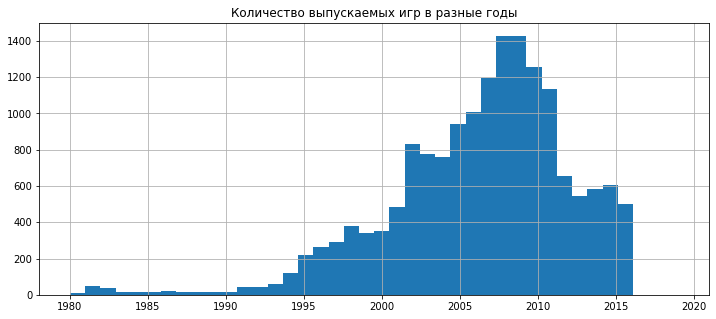

,platform,all_sales_sum
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


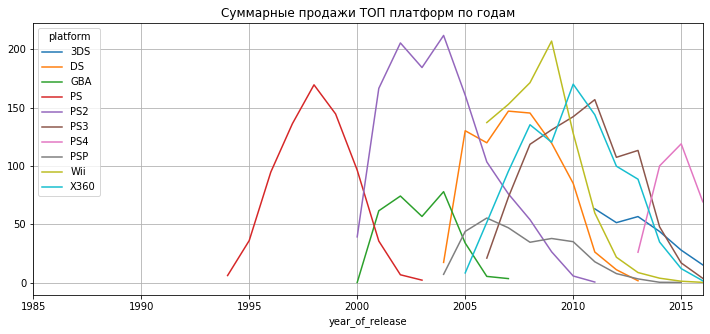

Платформы в актуальном периоде ['3DS' 'DS' 'PC' 'PS3' 'PS4' 'PSP' 'PSV' 'Wii' 'WiiU' 'X360' 'XOne']


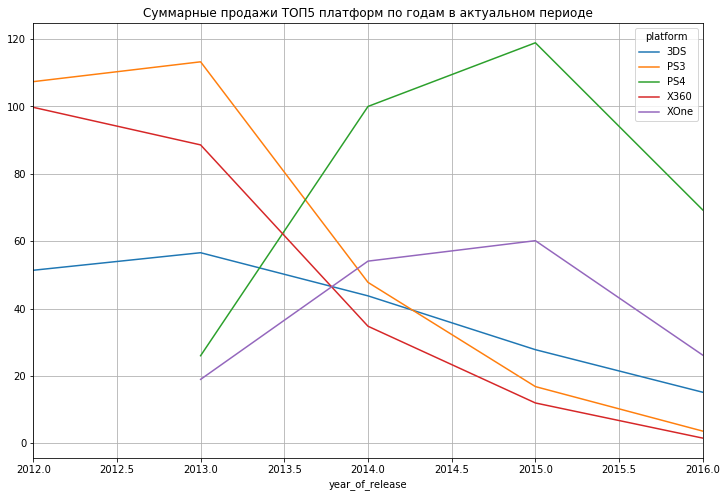

In [5]:
#Посмотрим, сколько игр выпускалось в разные годы. 
data['year_of_release'].hist(bins=40, range=(1980, 2019), figsize=(12, 5)) 
plt.title('Количество выпускаемых игр в разные годы')
plt.show()
print()

#посмотрим, как менялись продажи по платформам.
#сгруппируем данные по платформам и отсортируем по суммарным продажам
data_pivot_platform = data.pivot_table(index=['platform'], values='all_sales', aggfunc=['sum'])
data_pivot_platform.columns = ['all_sales_sum'] #переименнуем столбец
display(data_pivot_platform.sort_values(by='all_sales_sum', ascending=False).head(10).reset_index()) 
#создадим список топ платформ
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS'] 

#сгруппируем данные по платформам и годам по суммарным продажам и построим распределение по годам
data.query('platform in @top_platforms').pivot_table(index='year_of_release', 
                                                      columns = 'platform', values='all_sales', 
                                                      aggfunc='sum').plot(grid=True, figsize=(12, 5))
plt.title('Суммарные продажи ТОП платформ по годам')
plt.show()

#возьмем данные за соответствующий актуальный период
data_new = data.query(('year_of_release > 2011')) 
#посмотрим какие платформы остались в этом периоде
print('Платформы в актуальном периоде', data_new['platform'].sort_values().unique()) 
#создадим список платформ
#platforms = ['3DS', 'DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne'] #все 
platforms = ['PS4', 'XOne', 'X360', 'PS3', '3DS'] #ТОП5
#сгруппируем данные по платформам и годам по суммарным продажам и построим распределение по годам
data_new.query('platform in @platforms').pivot_table(index='year_of_release', 
                                                      columns = 'platform', values='all_sales', 
                                                      aggfunc='sum').plot(grid=True, figsize=(12, 8))
plt.title('Суммарные продажи ТОП5 платформ по годам в актуальном периоде')
plt.show()


### Вывод

- Посмотрим, сколько игр выпускалось в разные годы. Для этого построим гистограмму. Видим, что до 1995 года игр создавалось очень мало. Далее наблюдаем резкий рост на рынке компьютерных игр. Пик приходится на 2008-2009 года. Далее наблюдаем резкий спад где то вдвое от общего числа и до окончания исследуемого периода выпуск игр остается примерно на одном уровне. Чтобы ответить на вопрос важны ли данные за все периоды, необходимо проанализировать имеющиеся данные.
- Посмотрим, как менялись продажи по платформам. Для этого выберим платформы с наибольшими суммарными продажами и построим распределение по годам. Видим, что характерный срок появления новых и исчезания старых платформ составляет примерно 11 лет. 
- Актуальным периодом для наших исследований будем считать последние 5 лет (т.е. с начала 2012 по 2016 включительно), в этот период рынок компьтерных игр развивался относительно равномерно, а также этот период достаточен чтобы понять изменение популярности существующих платформ. Возьмем данные за соответствующий актуальный период - эти данные помогут построить прогноз на 2017 год. Данные за предыдущие годы в работе учитывать не будем.
- За исследуемый актуальный период видим явно выраженных 5 лидеров по продажам. В ТОП5 вошли 'PS4', 'XOne', 'X360', 'PS3', '3DS'. Отметитим, что на конец 2016 года все анализируемые платформы падают и не одна не растет. Из потенциально прибыльных платформ можно отметить 'PS4', 'XOne', которые перешли пик по продажам в 2015 году и которые возможно не растеряют свою популярность в ближайшие 5 лет. Возможно имеет смысл их рассматривать в первую очередь. (Список всех платформ за актуальный период, сделав определенные выводы, закомментил и оставил список для ТОП5 платформ).

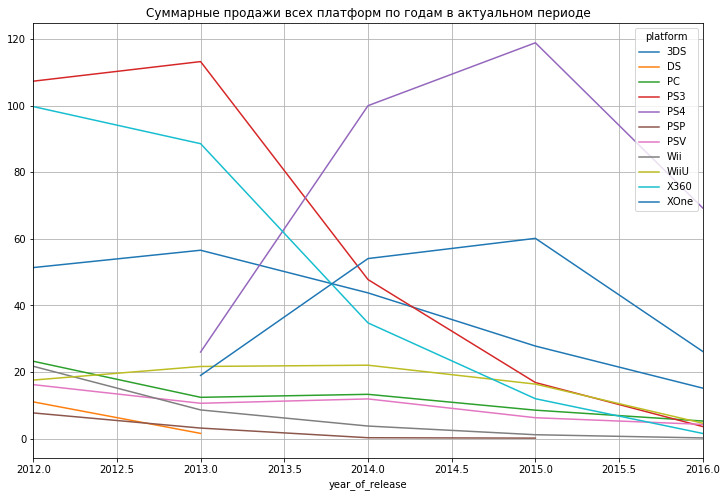

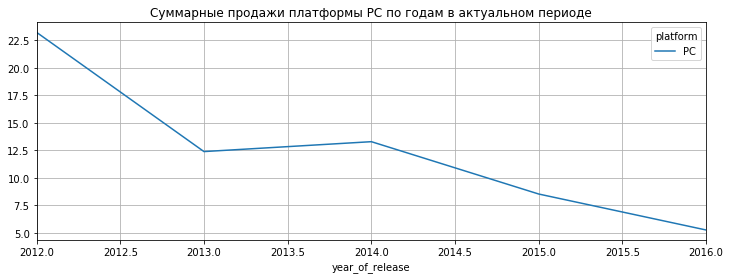

In [6]:
#сгруппируем данные по платформам и годам по суммарным продажам и построим распределение по годам
data_new.pivot_table(index='year_of_release', columns = 'platform', values='all_sales', 
                     aggfunc='sum').plot(grid=True, figsize=(12, 8))
plt.title('Суммарные продажи всех платформ по годам в актуальном периоде')
plt.show()
#сгруппируем данные по платформам и годам по суммарным продажам и построим распределение по годам
data_new.query('platform == "PC"').pivot_table(index='year_of_release', 
                                                      columns = 'platform', values='all_sales', 
                                                      aggfunc='sum').plot(grid=True, figsize=(12, 4))
plt.title('Суммарные продажи платформы PC по годам в актуальном периоде')
plt.show()

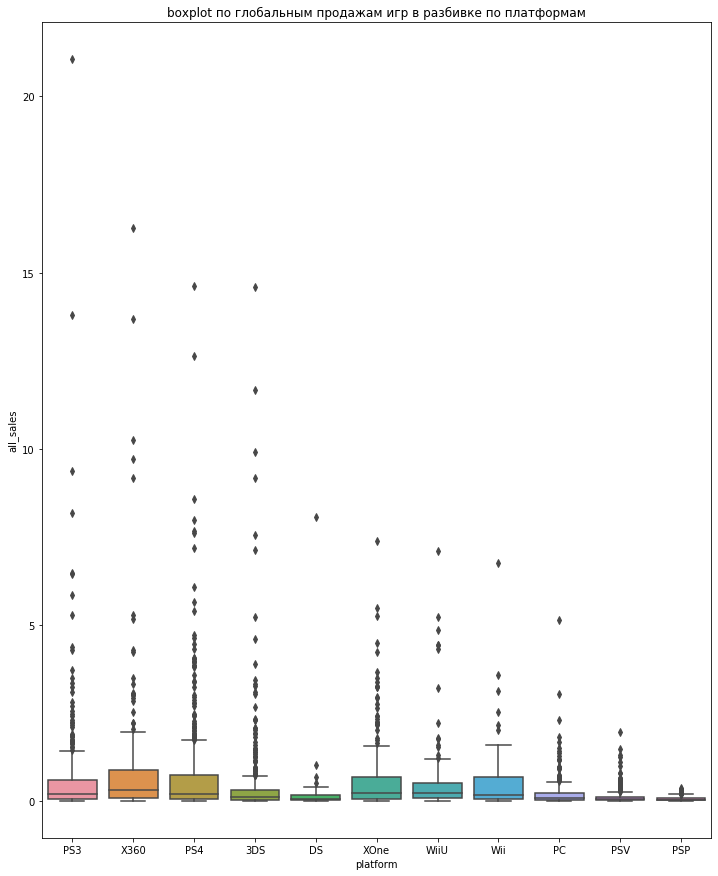

In [7]:
#построим boxplot, у которого по оси x платформы, 
#а по оси y - суммарные продажи конкретных игр по всем регионам.
fig, axes = plt.subplots(figsize=(12,15))
sns.boxplot(x=data_new['platform'], y=data_new['all_sales'])
plt.title('boxplot по глобальным продажам игр в разбивке по платформам')
plt.show()

### Вывод

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. На графике видим распределение продаж по каждой платформе. В целом количество проданных игр на каждой платформе не сильно отличаются, медиана продаж у ТОП5 платформ находится примерно на одном уровне. Здесь гораздо интереснее выбросы. И как итернет магазин продающий игры, нас в первую очередь интересовали бы именно эти самые популярные значения. Например видим, что ТОП10 самых популярных игр в исследуемом периоде вышли на платформах 'PS3', 'X360', 'PS4' и '3DS'.  

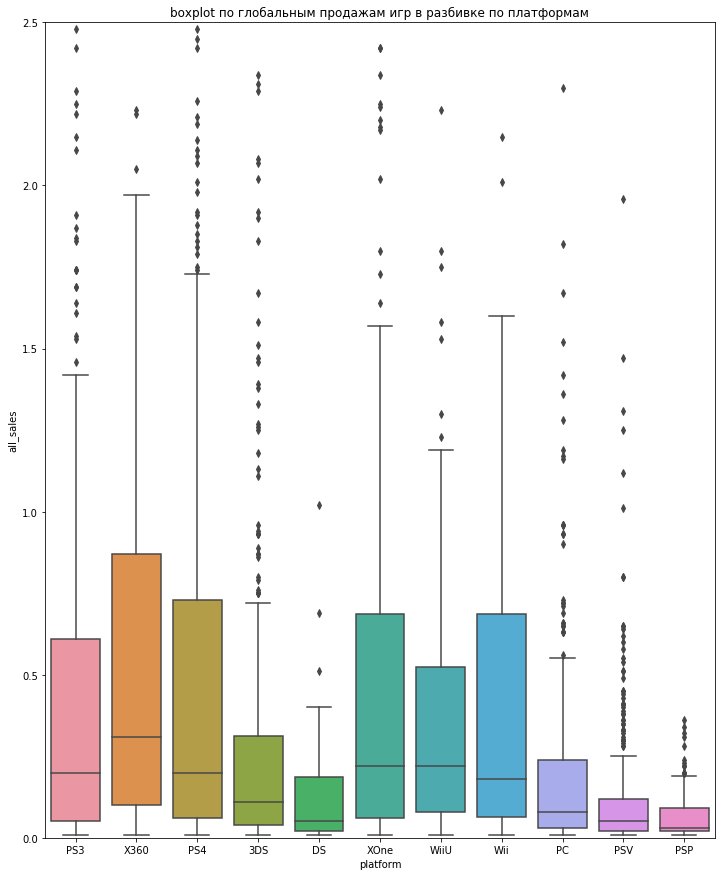

In [8]:
#построим boxplot, у которого по оси x платформы,
#а по оси y - суммарные продажи конкретных игр по всем регионам с указанием plt.ylim()
fig, axes = plt.subplots(figsize=(12,15))
sns.boxplot(x=data_new['platform'], y=data_new['all_sales'])
plt.ylim(0, 2.5)
plt.title('boxplot по глобальным продажам игр в разбивке по платформам')
plt.show()

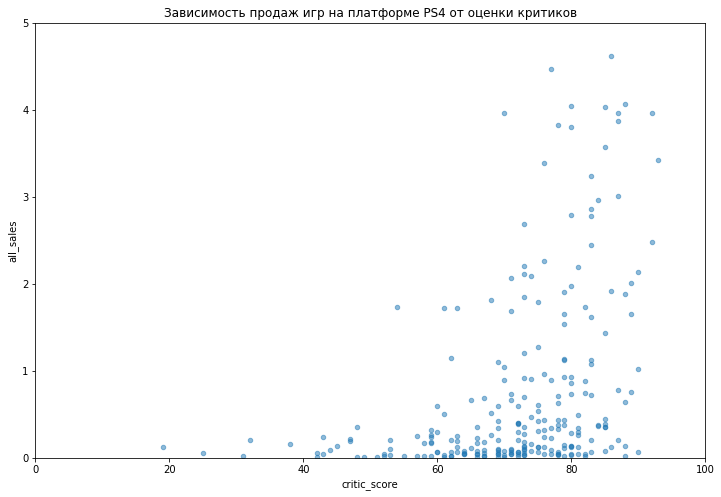

Зависимость продаж от оценки критиков для PS4
              all_sales  critic_score
all_sales      1.000000      0.406568
critic_score   0.406568      1.000000



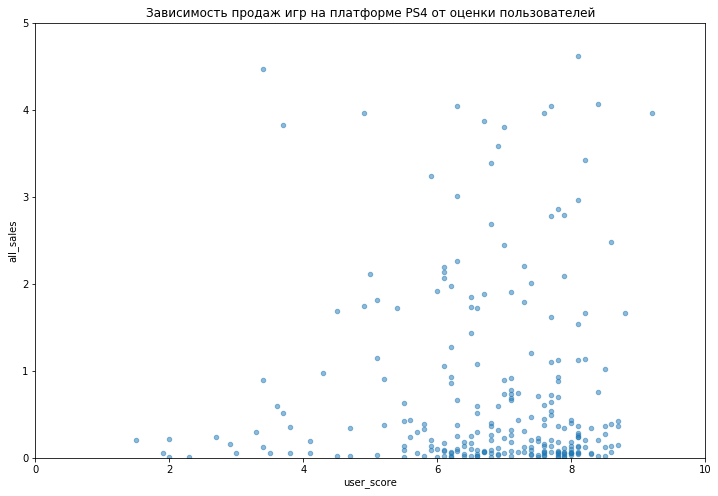

Зависимость продаж от оценки пользователей для PS4
            all_sales  user_score
all_sales    1.000000   -0.031957
user_score  -0.031957    1.000000

Зависимость продаж от оценки критиков для XOne
              all_sales  critic_score
all_sales      1.000000      0.416998
critic_score   0.416998      1.000000
Зависимость продаж от оценки пользователей для XOne
            all_sales  user_score
all_sales    1.000000   -0.068925
user_score  -0.068925    1.000000
Зависимость продаж от оценки критиков для X360
              all_sales  critic_score
all_sales      1.000000      0.360573
critic_score   0.360573      1.000000
Зависимость продаж от оценки пользователей для X360
            all_sales  user_score
all_sales    1.000000    0.006164
user_score   0.006164    1.000000
Зависимость продаж от оценки критиков для PS3
              all_sales  critic_score
all_sales      1.000000      0.331497
critic_score   0.331497      1.000000
Зависимость продаж от оценки пользователей для PS3
     

In [9]:
#возьмем данные по платформе 'PS4' по продажам и оценкам критиков за соответствующий актуальный период
data_new_psc = data_new.query(('platform == "PS4"')).loc[:, ['all_sales', 'critic_score']]
data_new_psc.plot(x='critic_score', y='all_sales', xlim=(0, 100), ylim=(0, 5), 
                 kind='scatter', alpha=0.5, figsize=(12, 8))
plt.title('Зависимость продаж игр на платформе PS4 от оценки критиков')
plt.show()
print('Зависимость продаж от оценки критиков для PS4') 
print(data_new_psc.corr()) #выведем корреляцию 
print()
#возьмем данные по платформе 'PS4' по продажам и оценкам пользователей за актуальный период
data_new_psu = data_new.query(('platform == "PS4"')).loc[:, ['all_sales', 'user_score']]
data_new_psu.plot(x='user_score', y='all_sales', xlim=(0, 10), ylim=(0, 5), 
                 kind='scatter', alpha=0.5, figsize=(12, 8))
plt.title('Зависимость продаж игр на платформе PS4 от оценки пользователей')
plt.show()
print('Зависимость продаж от оценки пользователей для PS4') 
print(data_new_psu.corr()) #выведем корреляцию 
print()
#зависимость по остальным платформам из ТОП5
for pl in ['XOne', 'X360', 'PS3', '3DS']:
    data_new_psc = data_new.query(('platform == @pl')).loc[:, ['all_sales', 'critic_score']]
    data_new_psu = data_new.query(('platform == @pl')).loc[:, ['all_sales', 'user_score']]
    print('Зависимость продаж от оценки критиков для', pl) 
    print(data_new_psc.corr()) #выведем корреляцию 
    print('Зависимость продаж от оценки пользователей для', pl) 
    print(data_new_psu.corr()) #выведем корреляцию 


### Вывод

Посмотрим, как влияют на продажи внутри одной популярной платформы, в нашем случае PS4, отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между оценками и продажами. По диаграммам рассеивания в нашем случае сложно определить зависимости, хотя для зависимости оценки критиков, все же можно увидеть некую зависимость, увеличение продаж игры от более высокой оценке критиков. А вот при расчете корреляции, сразу становится понятно, что есть средняя прямая зависимость продаж от оценки критиков и практически отсутствие зависимости продаж от оценки пользователей. Посчитав корреляцию для нескольких других платформ, видим аналогичную картину и там.

,genre,all_sales_sum,count_game,median_sales
0,Shooter,304.73,235,0.44
1,Sports,181.07,268,0.24
2,Platform,61.00,85,0.21
3,Role-Playing,192.80,370,0.14
4,Racing,53.50,115,0.14
5,Fighting,44.49,109,0.13
6,Action,441.12,1031,0.12
7,Misc,85.04,192,0.12
8,Simulation,35.12,80,0.12
9,Strategy,13.34,71,0.08


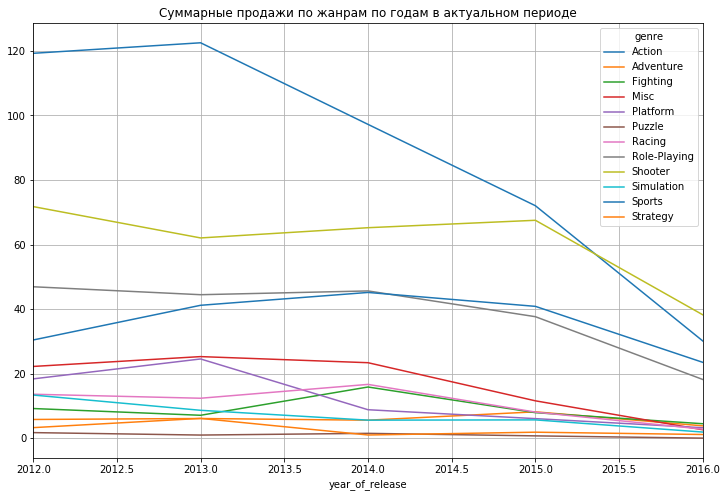

In [10]:
#посмотрим, как менялись продажи по жанрам.
#сгруппируем данные по жанрам и отсортируем по суммарным продажам
data_pivot_genre = data_new.pivot_table(index=['genre'], values='all_sales', aggfunc=['sum', 'count', 'median'])
data_pivot_genre.columns = ['all_sales_sum', 'count_game', 'median_sales'] #переименнуем столбец
display(data_pivot_genre.sort_values(by='median_sales', ascending=False).head(10).reset_index()) 
#сгруппируем данные по жанрам и годам по суммарным продажам и построим распределение по годам
data_new.pivot_table(index='year_of_release', 
                     columns = 'genre', values='all_sales', 
                     aggfunc='sum').plot(grid=True, figsize=(12, 8))
plt.title('Суммарные продажи по жанрам по годам в актуальном периоде')
plt.show()

### Вывод

На графике видим общее распределение игр по жанрам. Самые прибыльные жанры 'Action', 'Shooter', 'Role-Playing', 'Sports' и они заметно выделяются на фоне других. Остальные примерно одинаковы по продажам.  

## Портрет пользователя каждого региона

,platform,na_sales
0,X360,140.05
1,PS4,108.74
2,PS3,103.38
3,XOne,93.12
4,3DS,55.31


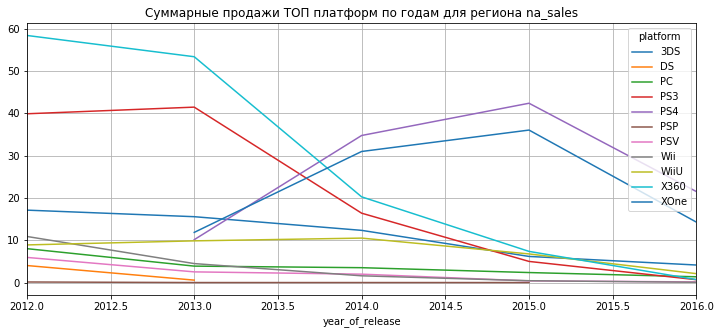

,genre,na_sales
0,Action,177.84
1,Shooter,144.77
2,Sports,81.53
3,Role-Playing,64.00
4,Misc,38.19


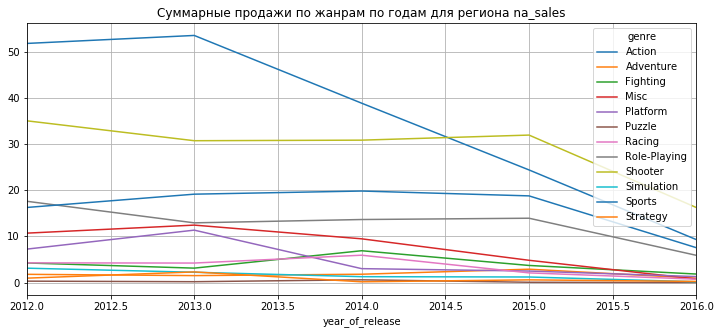

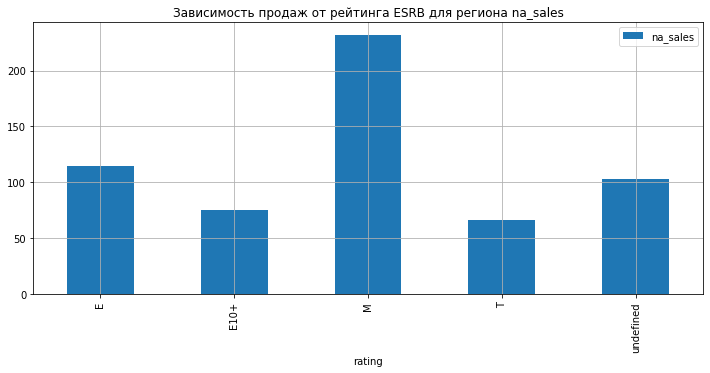

,platform,eu_sales
0,PS4,141.09
1,PS3,106.86
2,X360,74.52
3,XOne,51.59
4,3DS,42.64


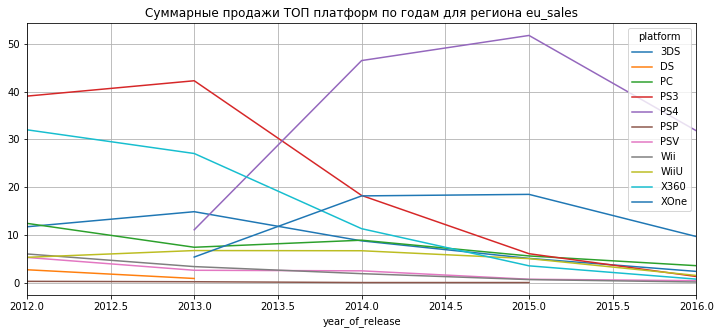

,genre,eu_sales
0,Action,159.34
1,Shooter,113.47
2,Sports,69.09
3,Role-Playing,48.53
4,Racing,27.29


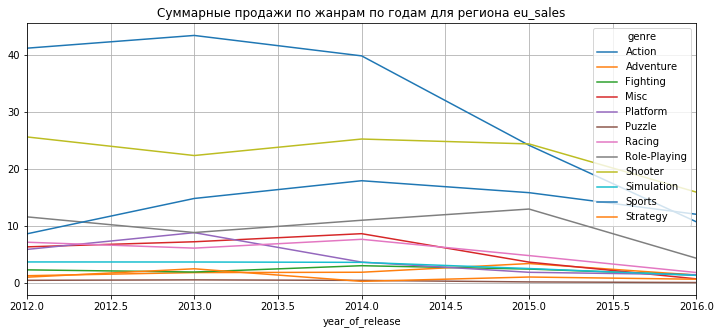

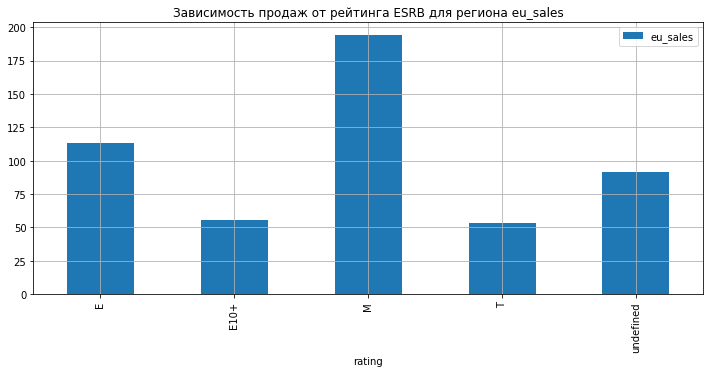

,platform,jp_sales
0,3DS,87.79
1,PS3,35.29
2,PSV,21.04
3,PS4,15.96
4,WiiU,13.01


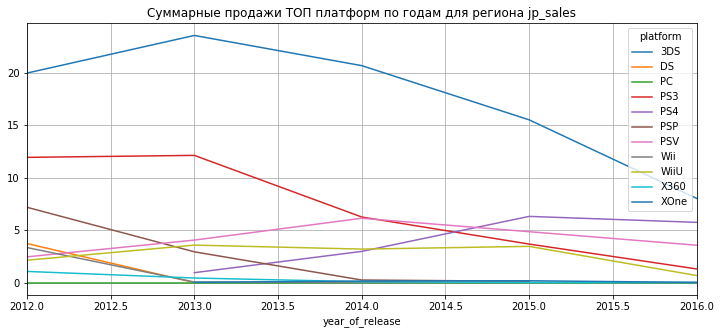

,genre,jp_sales
0,Role-Playing,65.44
1,Action,52.80
2,Misc,12.86
3,Simulation,10.41
4,Fighting,9.44


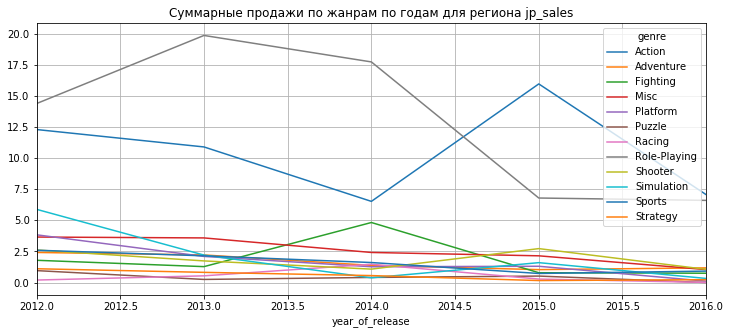

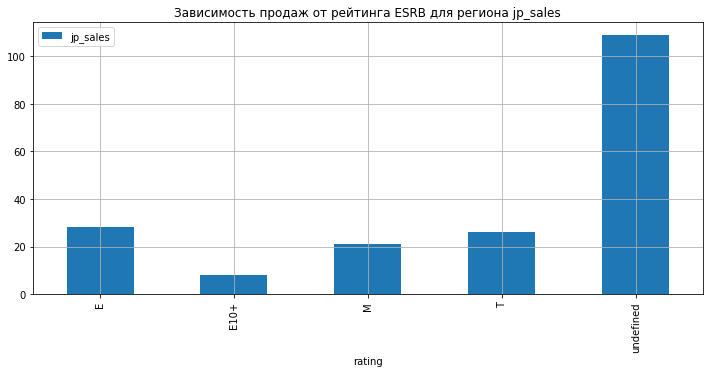

In [11]:
#посмотрим, как менялись продажи по регионам.
for area in ['na_sales', 'eu_sales', 'jp_sales']:
    #сгруппируем данные по платформам и отсортируем по суммарным продажам
    data_pivot_platform_area = data_new.pivot_table(index=['platform'], values=area, aggfunc=['sum'])
    data_pivot_platform_area.columns = [area] #переименнуем столбец
    display(data_pivot_platform_area.sort_values(by=area, ascending=False).head().reset_index()) 
    #сгруппируем данные по платформам и годам по суммарным продажам и построим распределение по годам
    (data_new.pivot_table(index='year_of_release', columns = 'platform', values=area, 
                      aggfunc='sum').plot(grid=True, figsize=(12, 5)))
    plt.title('Суммарные продажи ТОП платформ по годам для региона ' + area)
    plt.show()
    #посмотрим, как менялись продажи по жанрам.
    #сгруппируем данные по жанрам и отсортируем по суммарным продажам
    data_pivot_genre_area = data_new.pivot_table(index=['genre'], values=area, aggfunc=['sum'])
    data_pivot_genre_area.columns = [area] #переименнуем столбец
    display(data_pivot_genre_area.sort_values(by=area, ascending=False).head().reset_index()) 
    #сгруппируем данные по жанрам и годам по суммарным продажам и построим распределение по годам
    data_new.pivot_table(index='year_of_release', columns = 'genre', values=area, 
                         aggfunc='sum').plot(grid=True, figsize=(12, 5))
    plt.title('Суммарные продажи по жанрам по годам для региона ' + area)
    plt.show()
    #зависимость продаж от рейтинга ESRB для региона
    data_new.pivot_table(index='rating', values=area, aggfunc='sum').plot(kind = 'bar', 
                                                                          grid=True, figsize=(12, 5))
    plt.title('Зависимость продаж от рейтинга ESRB для региона ' + area)
    plt.show()
    print()  

### Вывод

Определим портрет пользователя каждого региона (NA, EU, JP):    
- Для Северной Америки в ТОП5 платформ входят X360, PS4, PS3, XOne, 3DS в ТОП5 жанров - Action, Shooter, Sports, Role-Playing, Misc а также наибольшей популярностью пользуются игры для детей младше 10 лет и для взрослых 17+.    
- Для Европы в ТОП5 платформ входят PS4, PS3, X360, XOne, 3DS в ТОП5 жанров - Action, Shooter, Sports, Role-Playing, Racing и также наибольшей популярностью пользуются игры для детей младше 10 лет и для взрослых 17+.основной аудиторией игроков являются дети младше 10 лет и молодые люди старше 18 лет    
- Для Японии в ТОП5 платформ входят 3DS, PS3, PSV, PS4, WiiU в ТОП5 жанров - Role-Playing, Action, Misc, Simulation, Fighting а также наибольшей популярностью пользуются игры для детей младше 10 лет и подростков до 17 лет.     
    
Подведя итог видим, что предпочтения по используемым платформам, жанрам и даже по аудитории пользователей в разных регионах сильно различаются. Это объясняется рядом причин, политикой государства, укладом жизни населения и другими факторами.

## Проверка гипотез

In [12]:
#удалим пропуски в столбце 'user_score'
data_new = data_new.dropna(subset=['user_score']) 

#проверим первое утверждение
#срез по платформе Xbox One 
data_new_xboxone = data_new.query(('platform == "XOne"'))
#data_new_xboxone.info()
#срез по платформе PC 
data_new_pc = data_new.query(('platform == "PC"'))
#data_new_pc.info()

alpha = .01 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(data_new_xboxone['user_score'], data_new_pc['user_score'], equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


In [13]:
#проверим второе утверждение
#срез по жанру Action  
data_new_action = data_new.query(('genre == "Action"'))
#data_new_action.info()
#срез по жанру Sports 
data_new_sports = data_new.query(('genre == "Sports"'))
#data_new_sports.info()

alpha = .01 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(data_new_action['user_score'], data_new_sports['user_score'], equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  4.24307776572644e-20
Отвергаем нулевую гипотезу


### Вывод

По условию проекта имеем две гипотезы о равенстве средних двух генеральных совокупностей. Воспользуемся специальным методом для проверки гипотез о равенстве среднего по взятым из них выборкам st.ttest_ind(). Имеем достаточно большие, но не равные по размеру выборки в обоих случаях. Количество жителей Москвы и других городов не равно и количество пользователей тарифами тоже разное. Это видно из срезов методом info() (закомметил, чтобы не перегружать визуализацию). Сравним средние t-тестом, указав параметр equal_var = False, чтобы тест посчитал дисперсии выборок по отдельности. Пороговое значение alpha зададим 0,01.    
    
**Первое утверждение - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**    
*Нулевая гипотеза:*
- средние пользовательские рейтинги платформ Xbox One и PC равны    
    
*Альтернативная гипотеза:*
- средние пользовательские рейтинги платформ Xbox One и PC различаются    

В результате расчетов отвергнуть нулевую гипотезу не получилось, это говорит о том, что с большой вероятностью средние пользовательские рейтинги платформ Xbox One и PC равны. То есть первое утвердждение скорее всего верно.    
    
**Второе утверждение - Средние пользовательские рейтинги жанров Action и Sports разные.**    
*Нулевая гипотеза:*
- средние пользовательские рейтинги жанров Action и Sports равны     
    
*Альтернативная гипотеза:*
- средние пользовательские рейтинги жанров Action и Sports различаются    
    
В результате расчетов отвергаем нулевую гипотезу, это говорит о том, что действительно с большой вероятностью средние пользовательские рейтинги жанров Action и Sports различаются. То есть второе утвердждение скорее всего также верно.


## Общий вывод


**Цель** данного исследования, выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.    
   
 
Интернет-магазин «Стримчик» продаёт компьютерные игры по всему миру. Из открытых источников имеем исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 
   

**Предобработка данных**    

В первой части анализа - *Предобработка данных*  столкнулись с минимум проблем. Техническая команда осуществляющая выгрузку данных справилась с работой в целом не плохо. Но тем не менее было обнаружено следующее:    
- *В исходных данных обнаружили пропуски в столбцах 'Name', 'Year_of_Release', 'Genre'. Значения там были пропущены из-за технической ошибки.*
- *Названия столбцов были отображены некорректно.*
- *Столбец с годами перевели в целочисленный тип*   


**Исследовательский анализ данных**    

Для удобства исследовательского анализа выделили из всего массива данных актуальный период. Эти данные помогут построить прогноз на 2017 год. Так же отметили интересный факт, что характерный срок появления новых и исчезания старых платформ составляет примерно 11 лет. Актуальным периодом для наших исследований посчитали последние 5 лет (т.е. с начала 2012 по 2016 включительно), в этот период рынок компьтерных игр развивался относительно равномерно, а также этот период достаточен чтобы понять изменение популярности существующих платформ.    
За исследуемый актуальный период выявили явно выраженных 5 лидеров по продажам. В ТОП5 вошли 'PS4', 'XOne', 'X360', 'PS3', '3DS'. Отметитим, что на конец 2016 года все анализируемые платформы падают и не одна не растет. Из потенциально прибыльных платформ можно отметить 'PS4', 'XOne', которые перешли пик по продажам в 2015 году и которые возможно не растеряют свою популярность в ближайшие 5 лет. Возможно имеет смысл их рассматривать в первую очередь.    
Также в ходе анализа увидели, что ТОП10 самых популярных игр в исследуемом периоде вышли на платформах 'PS3', 'X360', 'PS4' и '3DS'.      
Выявили зависимости продаж игр от оценок критиков и пользователей. На примере платформы PS4 нашли, что есть средняя прямая зависимость продаж от оценки критиков и практически отсутствие зависимости продаж от оценки пользователей. Посчитав корреляцию для нескольких других платформ, видим аналогичную картину и там.    
Общее распределение игр по жанрам выгдит следующим образом - самые прибыльные жанры 'Action', 'Shooter', 'Role-Playing', 'Sports' и они заметно выделяются на фоне других. Остальные примерно одинаковы по продажам.    
    
**Портрет пользователя каждого региона**    
    
В ходе исследовательского анализа пришли к выводу, что предпочтения по используемым платформам, жанрам и даже по аудитории пользователей в разных регионах сильно различаются. Это объясняется рядом причин, политикой государства, укладом жизни населения и другими факторами.

    
**Проверка гипотез**

В процессе исследования изучили две гипотезы о равенстве средних двух генеральных совокупностей по взятым из них выборкам. Выборки были достаточно большие, но не равные по размеру в обоих случаях.  Сравнивали средние t-тестом, указав пороговым значением alpha 0,01.    
  
В первом случае, в результате расчетов отвергнуть нулевую гипотезу не получилось, это говорит о том, что с большой вероятностью средние пользовательские рейтинги платформ Xbox One и PC равны. То есть первое утвердждение скорее всего верно.     
    
Во втором случае, отвергаем нулевую гипотезу, это говорит о том, что действительно с большой вероятностью средние пользовательские рейтинги жанров Action и Sports различаются. То есть второе утвердждение скорее всего также верно. 
    
**Подводя итог всему вышесказанному делаем вывод, что при анализе рынка потенциально популярных продуктов необходимо обращать внимание на следующие определяющие успешность игры закономерности:**    
- в первую очередь на регион продаж, в разных регионах разные возрастные аудитории, разные интересы и предпочтения; 
- на популярность платформы на текущий момент (мы рекомендуем на сегодня PlayStation 4, Xbox One для Северной Америки и Европы и 3DS для Японии);
- на оценки критиков;
- на жанр игр и возрастную аудиторию, которые как мы сказали выше, сильно зависят от региона (для Северной Америки и Европы на сегодня наиболее популярны жанры Action, Shooter, Sports, Role-Playing и более взрослая аудитория, а для Японии Role-Playing, Action, Misc, Simulation и аудитория, которую составляют дети до 10 лет).
